<a href="https://colab.research.google.com/github/TanmayeeKolli/Drug-Discovery-Model-Ovarian-Cancer/blob/main/t4_Drug_Discovery_for_Ovarian_Cancer_Part_4_Building_Regression_Model_with_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery for Ovarian Cancer [Part 4] Building a Regression Model with Random Forest Regression**

*Tanmayee Kolli*




In **Part 4**, I used Random Forest to build a regression model of PARP inhibitors. I worked with Pubchem fingerprints from Part 3 and Lipinski Descriptors from Part 2. Lipinski Descriptors describe the "global features" of the molecule (size, solubility, Hydrogen bond donors and acceptors). The Pubchem Fingerprints describe the local features, or "the unique building bloks of the molecule" (Nantasenamat).


Reference: [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)   by Chanin Nantasenamat

---

## **1. Import libraries**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

I loaded the Pubchem Fingerprint data from Part 3.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Drug Discovery Ovarian Cancer project/data/PARP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df.head(4)

Mounted at /content/gdrive/


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.494850
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.769551
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.000000


## **3. Input features**
This data set contains 881 input features and 1 output variable (pIC50 values). Each molecule contains a unique fingerprint that will allow the machine learning model to learn how certain fingerprints correlate with chemical properties. The model will then be able to distinguish which input molecules are active or inactive with fingerprints that indicate if a moledule would make a potent drug.

### **3.1. Input features**

By dropping the pIC50 column, I created the input for our model. This will be the X.

In [6]:
X = df.drop('pIC50', axis=1)
X.head(4)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

The pIC50 column will be out output, or Y.

In [7]:
Y = df.pIC50
Y.head(4)

,pIC50
0,9.000000
1,7.494850
2,7.769551
3,9.000000


### **3.3. Let's examine the data dimension**

By looking at the shape of the input and output, we can see that there are 744 compounds and 881 Pubchem Fingerprints.

In [8]:
X.shape

(744, 881)

In [9]:
Y.shape

(744,)

### **3.4. Remove low variance features**

Below code is taken from Nantasenamat; it removes low variance features as they have limited predictive power, induce noise in the data, and can slow down model training. VarianceThreshold calculates the variance for every Fingerprint. If the variance is below 0.16, the Fingerprint is removed.

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

There are now only 147 Fingerprints left.

In [11]:
X.shape

(744, 147)

## **4. Data split (80/20 ratio)**

The data is split so that 80% will be used for training the model and 20% will be used for validating the model.

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

We can see that 595 molecules, or 80% of the 744, are being used for training (X_train). The coressonding 595 pIC50 values are used as the output for this training, or Y_train.

In [13]:
X_train.shape, Y_train.shape

((595, 147), (595,))

20% of the 744 gives 149 molecules for validating.

In [14]:
X_test.shape, Y_test.shape

((149, 147), (149,))

## **5. Building a Regression Model using Random Forest**

Below is the Random Forest Regression. The n_estimators is set to 100, meaning there are 100 decision trees in the forest, where each one trains on a slightly different subset of data. A large number of trees leads to more stable and reliable predicitons and reduces the likelihood of overfitting to a specific subset of data. When making predictions, it averages the predictions from all the trees (for regression) or takes a majority vote (for classification). In this case, we are doing regression as pIC50 is a continuous measurement.

I set a seed number using np.random.seed(100) to get the same model score every time.

In [15]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5780874990442799

A model score, or R^2 value of 0.58, indicates the model has a moderate fit.

The below code uses the trained model to generate predictions on the test data, or X_test.

In [18]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Predicted vs Experimental pIC50 Values**

This is a plot of the Predicted (Y_pred) vs Experimental (Y_test) pIC50 values. The below code is also taken from Nantasenamat's tutorial. There is clustering around the regression line, but there are variout outliers in our graph as well.

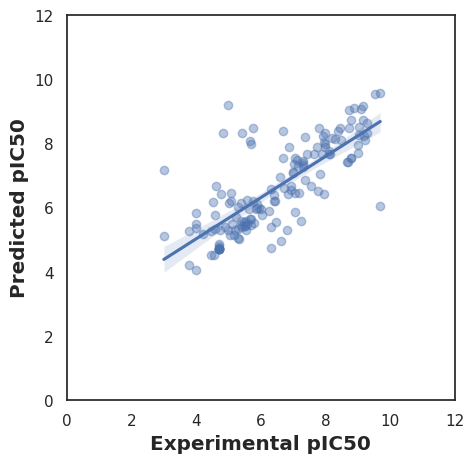

R² score: 0.5780874990442799


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.savefig('Predicted pIC50 vs Experimental pIC50.pdf')
plt.show()

r2 = r2_score(Y_test, Y_pred)
print(f'R² score: {r2}')
